# **Exploratory Data Analysis Of Fake News**

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import wordcloud 
from wordcloud import WordCloud
import statistics
from collections import Counter
import datetime
import textblob
from textblob import TextBlob
import sklearn
import os
from datetime import datetime

In [2]:
# import the data in pandas dataframes
fake_news = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
real_news = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

# create a new column with the class of each article in the dataset
fake_news["label"] = "fake"
real_news["label"] = "real"

# print dataset sizes
print("\nDataset Sizes:")
print (f"Fake News: {fake_news.shape}")
print (f"Real News: {real_news.shape}")


Dataset Sizes:
Fake News: (23481, 5)
Real News: (21417, 5)


In [3]:
# Remove location and publisher columns from real news dataframe for consistency with the fake news dataframe
real_news["text"] = real_news['text'].apply(lambda x: x.partition("-")[2])

# Display the subjects included in the dataset.
print (fake_news["subject"].unique())
print (real_news["subject"].unique())

# Remove the subjects because they are not clear and they are not adding any value for fake/real news classification.
fake_news.drop("subject", axis=1, inplace=True)
real_news.drop("subject", axis=1, inplace=True)
print("Original dataset subjects removed.")

# Remove articles with only pictures / no text
real_news = real_news[real_news["text"] != ""] 
fake_news = fake_news[fake_news["text"] != ""] 

# Print dataset sizes
print("\nDataset Sizes:")
print(f"Fake News: {fake_news.shape}")
print(f"Real News: {real_news.shape}")

print()

# Save the prepared dataset to .csv files
fake_news.to_csv('fakeForModeling.csv')
#!cp fakeForModeling.csv "./"
real_news.to_csv('trueForModeling.csv')
#!cp trueForModeling.csv "./"

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']
Original dataset subjects removed.

Dataset Sizes:
Fake News: (23481, 4)
Real News: (21415, 4)



In [4]:
# print the top 5 rows of the dataset for fake news
print("\nDataframe head for the fake news of the dataset:")
print(fake_news.head())

# iterating the columns
print("\nDataframe Columns: ")
for fcol in fake_news.columns:
    print(fcol)

# print the top 5 rows of the dataset for real news
print("\nDataframe head for the real news of the dataset:")
print(real_news.head())
    
# iterating the columns
print("\nDataframe Columns: ")
for rcol in real_news.columns:
    print(rcol)


Dataframe head for the fake news of the dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date label  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  fake  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  fake  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  fake  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  fake  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017  fake  

Dataframe Columns: 
title
text
date
label

Dataframe head for the real news of the dataset:
                                        

In [5]:
import ipywidgets as widgets
from IPython import display

from plotly.graph_objs import *
import plotly.graph_objects as go

widget1 = widgets.Output()
widget2 = widgets.Output()

# Render in output widgets
with widget1:
    display.display(fake_news.head(5))
with widget2:
    display.display(real_news.head(5))

# Create HBox
hbox = widgets.HBox([widget1, widget2])

# Render hbox
hbox

# Get the number of articles published daily.
daily_true = pd.DataFrame(real_news.groupby("date").size())
daily_fake = pd.DataFrame(fake_news.groupby("date").size())
daily_true.reset_index(inplace=True)
daily_fake.reset_index(inplace=True)
daily_true.rename(columns={0: "Number of Articles_true"}, inplace=True)
daily_fake.rename(columns={0: "Number of Articles_fake"}, inplace=True)

# Configure the plot.
layout = Layout(
    title='Number of Articles Published, Daily',
    xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(text='Date')),
    yaxis = go.layout.YAxis(title = go.layout.yaxis.Title(text='Number of Articles')),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')

# Plot the number of articles for each class.
fig = go.Figure(layout=layout)
fig.add_scatter(x=daily_true['date'], y=daily_true['Number of Articles_true'],mode='lines', line_color='rgb(0,176,246)', name = "True News")
fig.add_scatter(x=daily_fake['date'], y=daily_fake['Number of Articles_fake'],mode='lines', name = "Fake News")
fig.show()

# Compare article lengths in words.
words_per_article_plot_t = real_news["text"].apply(lambda x: len(x.split()))
stdev_t = statistics.stdev(words_per_article_plot_t)
words_per_article_t = words_per_article_plot_t.sum()/len(real_news["text"])

words_per_article_plot_f = fake_news["text"].apply(lambda x: len(x.split()))
stdev_f = statistics.stdev(words_per_article_plot_f)
words_per_article_f = words_per_article_plot_f.sum()/len(fake_news["text"])

print ("The average number of words in a real news article is ", words_per_article_t)
print ("The average number of words in a fake news article is ", words_per_article_f)

print ("The standard deviation in real news article lengths is ", stdev_t)
print ("The standard deviation in fake news article lengths is ", stdev_f)

The average number of words in a real news article is  382.15699276208267
The average number of words in a fake news article is  423.1979046888974
The standard deviation in real news article lengths is  273.80525497431927
The standard deviation in fake news article lengths is  408.3888904366352


**Plot The Number Of Words**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

Text(0.5, 1.0, 'Number of Words in Fake News Article')

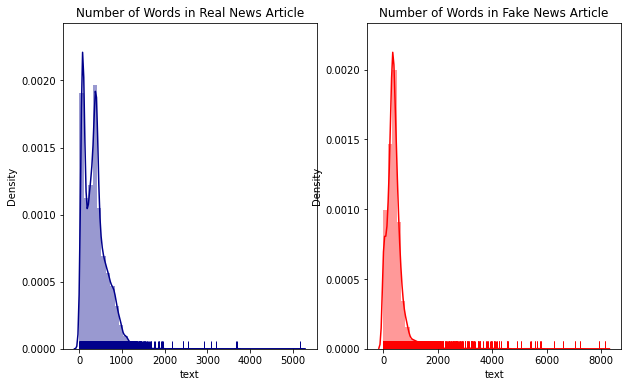

In [6]:
# Plot the number of words of each article for each class.
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(words_per_article_plot_t, ax = ax[0], color = "darkblue", rug = True).set_title("Number of Words in Real News Article")
sns.distplot(words_per_article_plot_f, ax = ax[1], color = "red", rug = True).set_title("Number of Words in Fake News Article")

**Plot Article Sentiments**

0.05305761649822618
0.05947378235243187


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

Text(0.5, 1.0, 'Fake News Article Sentiments')

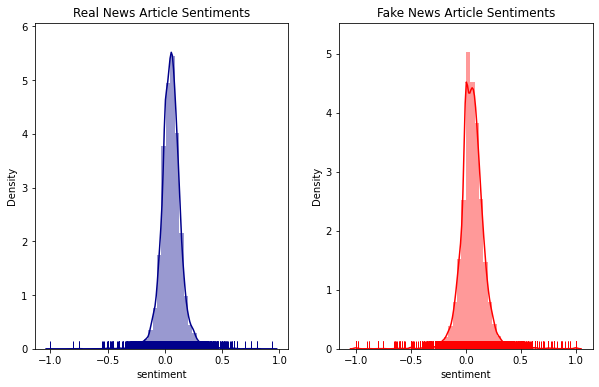

In [7]:
# Plot the sentiments of the articles in the dataset for each class.
article_polarity_true = pd.DataFrame(columns=["article", "sentiment"])
for article in real_news["text"]:
    article = TextBlob(article)
    article_polarity_true = article_polarity_true.append(pd.Series([article,article.sentiment.polarity], index=article_polarity_true.columns), ignore_index=True)

article_polarity_fake = pd.DataFrame(columns=["article", "sentiment"])
for article in fake_news["text"]:
    article = TextBlob(article)
    article_polarity_fake = article_polarity_fake.append(pd.Series([article,article.sentiment.polarity], index=article_polarity_fake.columns), ignore_index=True)

print(statistics.mean(article_polarity_true["sentiment"]))
print(statistics.mean(article_polarity_fake["sentiment"]))

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(article_polarity_true["sentiment"], ax = ax[0], color = "darkblue", rug = True).set_title("Real News Article Sentiments")
sns.distplot(article_polarity_fake["sentiment"], ax = ax[1], color = "red", rug = True).set_title("Fake News Article Sentiments")

**Plot Article Length**

The average number of words in a real news article is  9.95479803875788
The average number of words in a fake news article is  14.732805246795282
The standard deviation in real news article lengths is  1.7003266447007346
The standard deviation in fake news article lengths is  4.335099114452771


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables

Text(0.5, 1.0, 'Number of Words in Fake News Headline')

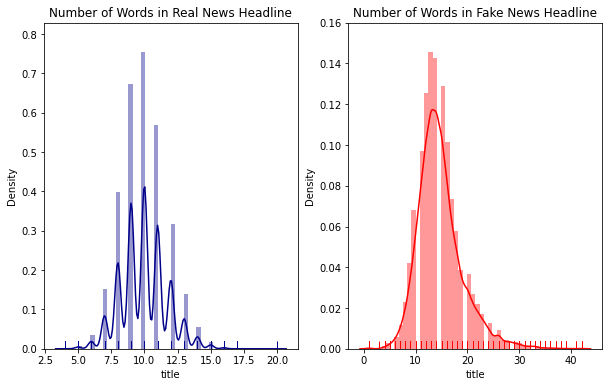

In [8]:
# Plot the length of each article for each class.
words_per_headline_plot_t = real_news["title"].apply(lambda x: len(x.split()))
stdev_t_head = statistics.stdev(words_per_headline_plot_t)
words_per_headline_t = words_per_headline_plot_t.sum()/len(real_news["title"])

words_per_headline_plot_f = fake_news["title"].apply(lambda x: len(x.split()))
stdev_f_head = statistics.stdev(words_per_headline_plot_f)
words_per_headline_f = words_per_headline_plot_f.sum()/len(fake_news["title"])

print ("The average number of words in a real news article is ", words_per_headline_t)
print ("The average number of words in a fake news article is ", words_per_headline_f)

print ("The standard deviation in real news article lengths is ", stdev_t_head)
print ("The standard deviation in fake news article lengths is ", stdev_f_head)

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.distplot(words_per_headline_plot_t, ax = ax[0], color = "darkblue", rug = True).set_title("Number of Words in Real News Headline")
sns.distplot(words_per_headline_plot_f, ax = ax[1], color = "red", rug = True).set_title("Number of Words in Fake News Headline")

**Data Cleansing And Pre-Processing**

In [9]:
import string
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import requests

stop_words = list(stopwords.words('english'))
#additional stopwords
stop_words.extend(["said", "reuters", "CNN", "image", "via", 'monday', 'tuesday', 'wednesday', 'thursday', 'friday']) 
# opening the file in read mode
extra_stopwords_file = open("../input/stopwords/stopwords-en.txt", "r")
# reading the file
extra_stopwords = extra_stopwords_file.read()
# replacing end splitting the text when newline ('\n') is seen.
extra_stopwords_list = extra_stopwords.split("\n")
# closing the file
extra_stopwords_file.close()
# appending the list of stopwords
stop_words.extend(extra_stopwords_list)

# Initialize the lemmatization process
lemmatizer = WordNetLemmatizer()  

words_in_t = [] #all tokens in true articles
words_in_f = [] #all tokens in fake articles
words_in_each_article_t = [] #list of true articles, each in tokenized form
words_in_each_article_f = [] #list of fake articles, each in tokenized form

def tokenize(article):
    '''
    Transforms all words into tokens
    '''
    return word_tokenize(article)

def to_lower_case(words):
    '''
    Transforms all words to lower case
    '''
    return [word.lower() for word in words if word.isalpha()]

def remove_stopwords_punctuation(words):
    '''
    Removes stopwords and punctuation from the dataset
    '''
    return [word for word in words if word not in string.punctuation and word not in stop_words]

def lemmatize(words):
    '''
    Converts a word to its root form, a lemma
    '''
    return [lemmatizer.lemmatize(word) for word in words]

def process(df, word_list, by_article_list):
    '''
    Executes cleansing and preprocessing for each article in the dataset
    '''
    for article in (df["text"]):
        words = tokenize(article)
        words = to_lower_case(words)
        words = remove_stopwords_punctuation(words)
        words = lemmatize(words)

        by_article_list.append(words)
        for w in words:
          word_list.append(w)

In [10]:
# Execute cleansing and preprocessing
process(fake_news, words_in_f, words_in_each_article_f)
process(real_news, words_in_t, words_in_each_article_t)

**Plot Wordcoulds**

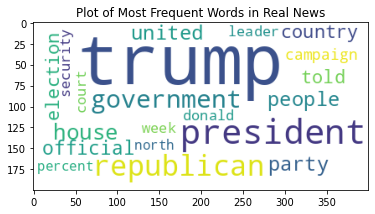

In [11]:
wordcounts_t = Counter(words_in_t)
wordcounts_f = Counter(words_in_f)
mostcommon_t = Counter(wordcounts_t).most_common(20)
mostcommon_f = Counter(wordcounts_f).most_common(20)

t_plot = dict(mostcommon_t)
mostcommon_t = pd.DataFrame(mostcommon_t, columns = ["Word", "Count"])
mostcommon_t = mostcommon_t.reset_index(drop=True)
mostcommon_t = mostcommon_t['Word'].tolist()

f_plot = dict(mostcommon_f)
mostcommon_f = pd.DataFrame(mostcommon_f, columns = ["Word", "Count"])
mostcommon_f = mostcommon_f.reset_index(drop=True)
mostcommon_f = mostcommon_f['Word'].tolist()
t_wc = WordCloud(max_words=25,relative_scaling=1,background_color ='white', normalize_plurals=False).generate_from_frequencies(t_plot)

plt.imshow(t_wc)
plt.title("Plot of Most Frequent Words in Real News")
plt.show()

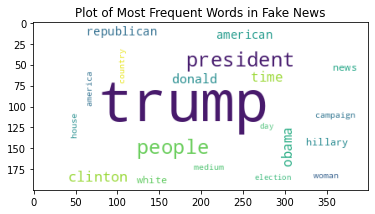

In [12]:
f_wc = WordCloud(max_words=25,relative_scaling=1,background_color ='white', normalize_plurals=False).generate_from_frequencies(f_plot)

plt.imshow(f_wc)
plt.title("Plot of Most Frequent Words in Fake News")
plt.show()

In [13]:
#Of the top 20 words in each class, 9 words are common 
len(set(mostcommon_t) & set(mostcommon_f))

9